In [9]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 4.5 MB/s  0:00:02a 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]


In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [23]:
def stationarity_check(ts):
    result = adfuller(ts)
    print(f"ADF Statistic : {result[0]}")
    print(f"p-value:{result[1]}")
    print(f"Critical values : {result[4]}")

def plot_acf_pacf(ts):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
    plot_acf(ts,ax=ax1,lags=20)
    plot_pacf(ts,ax=ax2,lags=20)
    plt.show()

In [14]:
stock_symbol = "AAPL"
start_date = "2015-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Close']

/tmp/ipykernel_13811/1853554278.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


In [15]:
stock_data

Ticker,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554745
2015-01-06,23.556955
2015-01-07,23.887276
2015-01-08,24.805086
...,...
2022-12-23,129.900269
2022-12-27,128.097504
2022-12-28,124.166779


In [19]:
log_returns = stock_data.pct_change().dropna()
log_returns = log_returns.apply(lambda x:np.log(1+x))

In [21]:
# Check stationarity
stationarity_check(log_returns)

# Differencing to make the series stationary
log_returns_diff = log_returns.diff().dropna()

# Check stationarity after differencing
stationarity_check(log_returns_diff)

ADF Statistic : -13.847567608592296
p-value:7.102798676053666e-26
Critical values : {'1%': np.float64(-3.4336173133865064), '5%': np.float64(-2.86298332472282), '10%': np.float64(-2.5675383641200633)}
ADF Statistic : -14.054070165966747
p-value:3.1399847331421217e-26
Critical values : {'1%': np.float64(-3.433648628001351), '5%': np.float64(-2.8629971502062155), '10%': np.float64(-2.5675457254979093)}


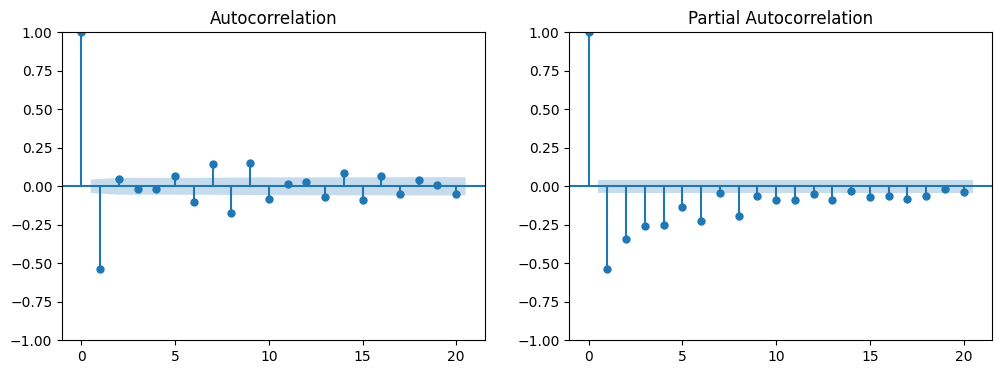

In [24]:
plot_acf_pacf(log_returns_diff)